In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [ ]:
### https://opendata-ajuntament.barcelona.cat/data/ca/dataset/est-mercat-immobiliari-lloguer-mitja-mensual

#### First, we are going to read all the datasets from the city council of Barcelona and combine them into one DataFrame. There are 7 datasets, from 2014 to 2020

In [2]:
# get data file names
path =r'./data/rent_prices'
filenames = glob.glob(path + "/*.csv")
print(filenames)

['./data/rent_prices/2017_lloguer_preu_trim.csv', './data/rent_prices/2014_lloguer_preu_trim.csv', './data/rent_prices/2019_lloguer_preu_trim.csv', './data/rent_prices/2016_lloguer_preu_trim.csv', './data/rent_prices/2020_lloguer_preu_trim.csv', './data/rent_prices/2015_lloguer_preu_trim.csv', './data/rent_prices/2018_lloguer_preu_trim.csv']


In [3]:
# read all the *.csv inside rent_prices/
all_rent_dfs = []
for file in filenames:
    df_per_year = pd.read_csv(file)
    all_rent_dfs.append(df_per_year)
    print(f'Size of {file}: {df_per_year.shape}')

Size of ./data/rent_prices/2017_lloguer_preu_trim.csv: (584, 8)
Size of ./data/rent_prices/2014_lloguer_preu_trim.csv: (584, 8)
Size of ./data/rent_prices/2019_lloguer_preu_trim.csv: (584, 8)
Size of ./data/rent_prices/2016_lloguer_preu_trim.csv: (584, 8)
Size of ./data/rent_prices/2020_lloguer_preu_trim.csv: (292, 8)
Size of ./data/rent_prices/2015_lloguer_preu_trim.csv: (584, 8)
Size of ./data/rent_prices/2018_lloguer_preu_trim.csv: (584, 8)


In [4]:
# make a super-dataframe with all the years
rent_df = pd.concat(all_rent_dfs, axis=0, ignore_index=True)
print(rent_df.shape)
rent_df.head()

(3796, 8)


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08


#### Translation to english

In [5]:
# rename the columns
rent_df = rent_df.rename(columns={'Any':'year',
                   'Trimestre':'quarter', 
                   'Codi_Districte':'district_code', 
                   'Nom_Districte':'district_name', 
                   'Codi_Barri':'neighborhood_code', 
                   'Nom_Barri':'neighborhood_name', 
                   'Lloguer_mitja':'type_mean_rent', 
                   'Preu':'price'})
rent_df.head()

,year,quarter,district_code,district_name,neighborhood_code,neighborhood_name,type_mean_rent,price
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08


In [10]:
rent_df = rent_df.assign(type_mean_rent= lambda df: 
                         df['type_mean_rent'].map({'Lloguer mitjà mensual (Euros/mes)':'Euros/month','Lloguer mitjà per superfície (Euros/m2 mes)':'Euros/m2 month'}))
rent_df.head()

,year,quarter,district_code,district_name,neighborhood_code,neighborhood_name,type_mean_rent,price
0,2017,1,1,Ciutat Vella,1,el Raval,Euros/month,734.99
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Euros/month,905.26
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Euros/month,722.78
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Euros/month,895.28
4,2017,1,2,Eixample,5,el Fort Pienc,Euros/month,871.08


#### Convert year and quarter into date format

In [11]:
def make_period(row):
    return f"{row['year']}Q{row['quarter']}"

In [12]:
rent_df['period'] = rent_df.apply(make_period, axis=1)
rent_df['period'] = pd.to_datetime(rent_df['period'])
rent_df['period']

0      2017-01-01
1      2017-01-01
2      2017-01-01
3      2017-01-01
4      2017-01-01
          ...    
3791   2018-10-01
3792   2018-10-01
3793   2018-10-01
3794   2018-10-01
3795   2018-10-01
Name: period, Length: 3796, dtype: datetime64[ns]

#### Plot the euros/m2 month vs year, by neighborhood

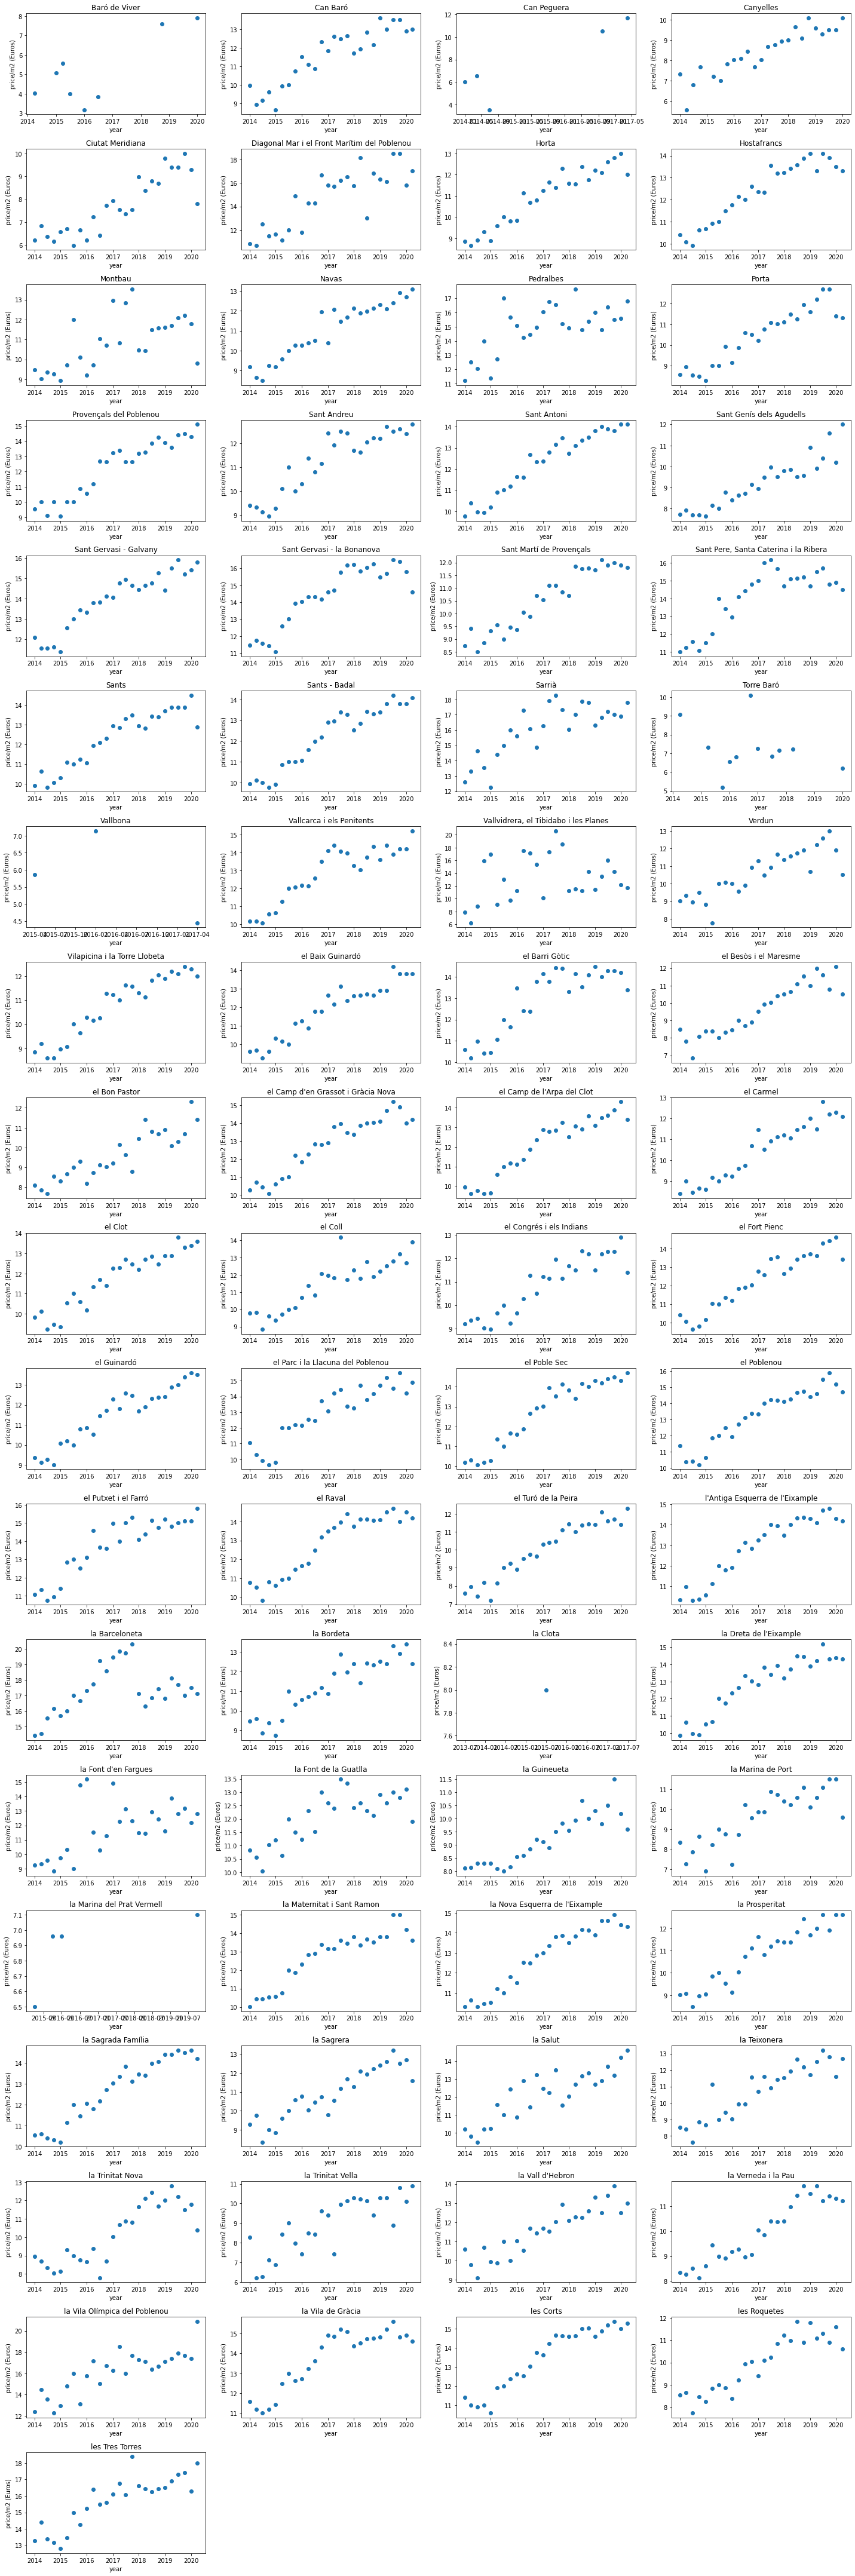

In [37]:
number_of_plots = rent_df['neighborhood_name'].nunique()

fig = plt.figure(figsize=(20,60))
n_cols = 4
n_rows = int(np.ceil(number_of_plots/n_cols))

n_plot = 1
for gr, mini_df in rent_df.groupby(by=['type_mean_rent','neighborhood_name']):
    if gr[0] == 'Euros/m2 month':
        ax = fig.add_subplot(n_rows, n_cols, n_plot)
        n_plot += 1
        _ = ax.scatter(x=mini_df['period'],y=mini_df['price'])
        _ = ax.set_xlabel('year')
        _ = ax.set_ylabel('price/m2 (Euros)')
        _ = plt.title(gr[1])
        
plt.tight_layout()